In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, \
accuracy_score, recall_score, precision_score, f1_score
import category_encoders as ce


from sklearn.linear_model import LassoCV
plt.rcParams['figure.figsize']= (20,8)

import warnings
warnings.filterwarnings("ignore")

In [161]:
df = pd.read_csv('churn_analysis.csv')

In [105]:
df.dtypes

Unnamed: 0                        int64
customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object


In [106]:
df['joining_date'] = [date.fromisoformat(x) for x in df['joining_date']]

In [107]:
#df['last_visit_time'] = [timedelta(x) for x in df['last_visit_time']]

df['last_visit_time'] =  \
[datetime.strptime(x, '%H:%M:%S').time() for x in df['last_visit_time']]


In [108]:
df.isna().sum()

Unnamed: 0                          0
customer_id                         0
Name                                0
age                                 0
gender                              0
security_no                         0
region_category                  8376
membership_category                 0
joining_date                        0
joined_through_referral             0
referral_id                         0
preferred_offer_types             447
medium_of_operation                 0
internet_option                     0
last_visit_time                     0
days_since_last_login               0
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days            0
points_in_wallet                 5406
used_special_discount               0
offer_application_preference        0
past_complaint                      0
complaint_status                    0
feedback                            0
churn_risk_score                19919
dtype: int64

In [109]:
df = df.dropna()

In [110]:
df.isna().sum()

Unnamed: 0                      0
customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [111]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [112]:
df.shape

(28373, 26)

In [113]:
df.dtypes

Unnamed: 0                        int64
customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object


In [162]:
df.describe()

,Unnamed: 0,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,56911.000000,56911.000000,56911.000000,56911.000000,56911.000000,51505.000000,36992.000000
mean,28455.000000,37.036355,-40.970902,243.704243,29287.618994,686.563762,3.463397
std,16428.934922,15.885146,226.896073,400.262304,19466.710286,193.398290,1.409661
min,0.000000,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,14227.500000,23.000000,8.000000,59.830000,14195.630000,615.970000,3.000000
50%,28455.000000,37.000000,12.000000,161.620000,27560.380000,697.820000,4.000000
75%,42682.500000,51.000000,16.000000,355.460000,40896.595000,764.280000,5.000000
max,56910.000000,64.000000,26.000000,3350.060000,99995.030000,2069.069761,5.000000


In [115]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
19919,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0
19921,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
19922,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0
19923,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0
19924,fffe43004900440036003300320035003300,Leslie Browder,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,...,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0


In [116]:
df = df.drop(['customer_id','Name', 'security_no', 'referral_id'], axis=1)
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
19919,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0
19921,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
19922,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0
19923,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0
19924,13,M,City,Gold Membership,2016-01-08,No,Gift Vouchers/Coupons,?,Wi-Fi,06:46:07,...,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0


In [117]:
df = df.replace('?', None)

In [118]:
df.isna().sum()

age                                0
gender                             0
region_category                    0
membership_category                0
joining_date                       0
joined_through_referral         4172
preferred_offer_types              0
medium_of_operation             4098
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [119]:
df = df.dropna()

In [120]:
df.shape

(20719, 21)

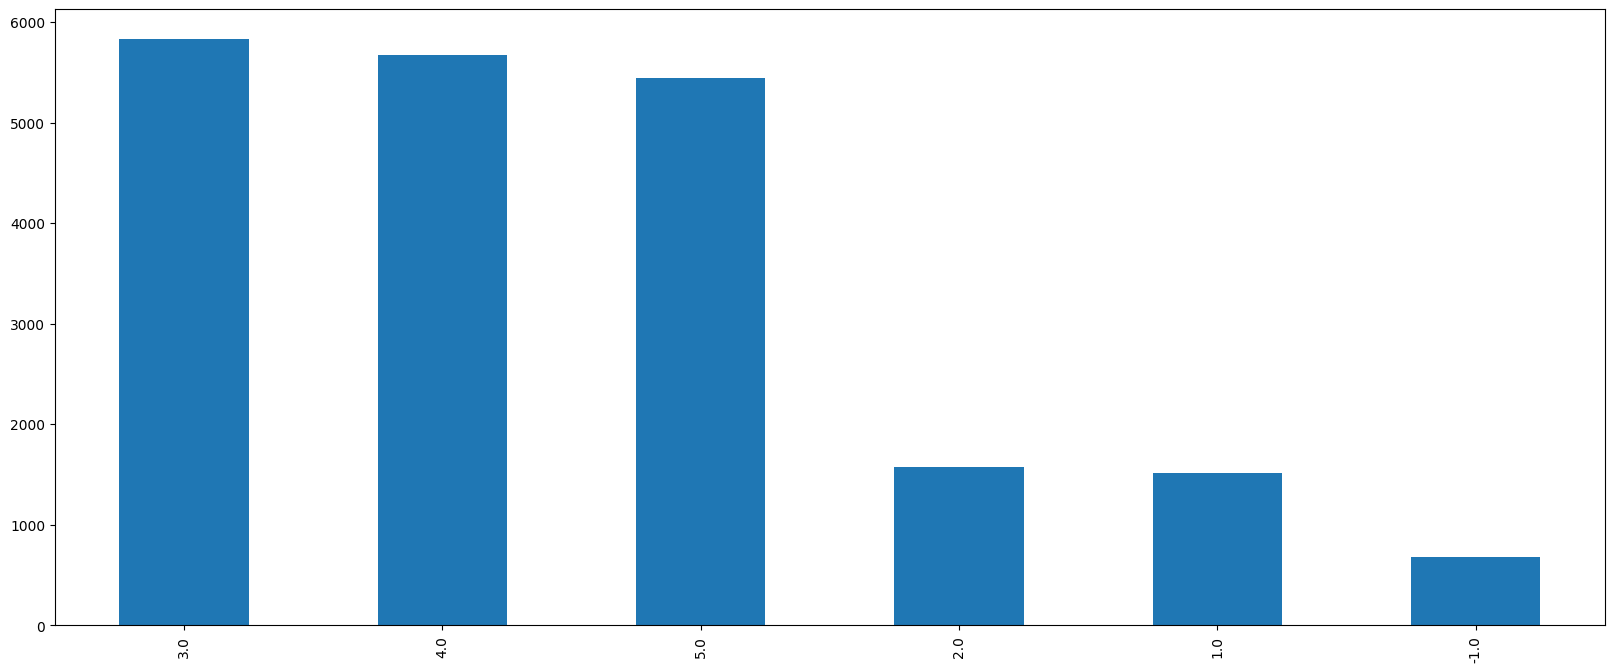

In [121]:
df.churn_risk_score.value_counts().plot(kind="bar")
plt.show()

In [122]:
df = df.reset_index()

In [123]:
df.set_index('index', inplace=True)
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
index,,,,,,,,,,,,,,,,,,,,,
19921,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
19922,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0
19923,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0
19925,21,M,Town,Gold Membership,2015-03-19,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,...,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3.0
19929,25,F,Village,Basic Membership,2016-05-22,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,05:57:20,...,570.23,35119.93,8.0,699.70,Yes,Yes,No,Not Applicable,Poor Product Quality,5.0


In [124]:
x = df.drop(['churn_risk_score'], 1)
y_n = df['churn_risk_score']

In [125]:
numerical = df._get_numeric_data().columns
categorical = list(set(df.columns) - set(numerical))
encoder = ce.OrdinalEncoder(categorical)
df = encoder.fit_transform(df)



In [126]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1))
data = df
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
index,,,,,,,,,,,,,,,,,,,,,
19921,0.629630,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.568837,0.204074,0.000000,0.445750,0.0,0.0,0.0,0.00,0.000,1.000000
19922,0.500000,0.5,0.5,0.0,0.000913,0.0,0.0,0.0,0.5,0.000054,...,0.489772,0.246577,0.001062,0.469416,0.0,0.0,0.0,0.25,0.000,1.000000
19923,0.388889,0.0,0.5,0.0,0.001826,1.0,0.5,0.5,0.5,0.000109,...,0.499997,0.238950,0.002123,0.503130,0.0,0.0,0.0,0.50,0.000,1.000000
19925,0.203704,0.5,0.0,0.2,0.002740,0.0,0.0,0.0,0.5,0.000163,...,0.490132,0.082552,0.003185,0.536048,1.0,1.0,0.0,0.00,0.125,0.666667
19929,0.277778,0.0,1.0,0.4,0.003653,0.0,0.0,1.0,0.0,0.000217,...,0.578073,0.346264,0.004246,0.516078,1.0,0.0,1.0,0.75,0.250,1.000000


In [127]:
X_new = data_scaled.drop(["churn_risk_score"],1)   #Feature Matrix
y_new = data_scaled["churn_risk_score"]  #Target Variable

reg = LassoCV()
reg.fit(X_new, y_new)


print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_new,y_new))
coef = pd.Series(reg.coef_, index = X_new.columns)

Best alpha using built-in LassoCV: 0.000187
Best score using built-in LassoCV: 0.365713


In [128]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 7 variables


In [129]:
coef==0

age                              True
gender                           True
region_category                 False
membership_category             False
joining_date                    False
joined_through_referral         False
preferred_offer_types           False
medium_of_operation              True
internet_option                  True
last_visit_time                 False
days_since_last_login           False
avg_time_spent                   True
avg_transaction_value           False
avg_frequency_login_days         True
points_in_wallet                False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                 True
feedback                        False
dtype: bool

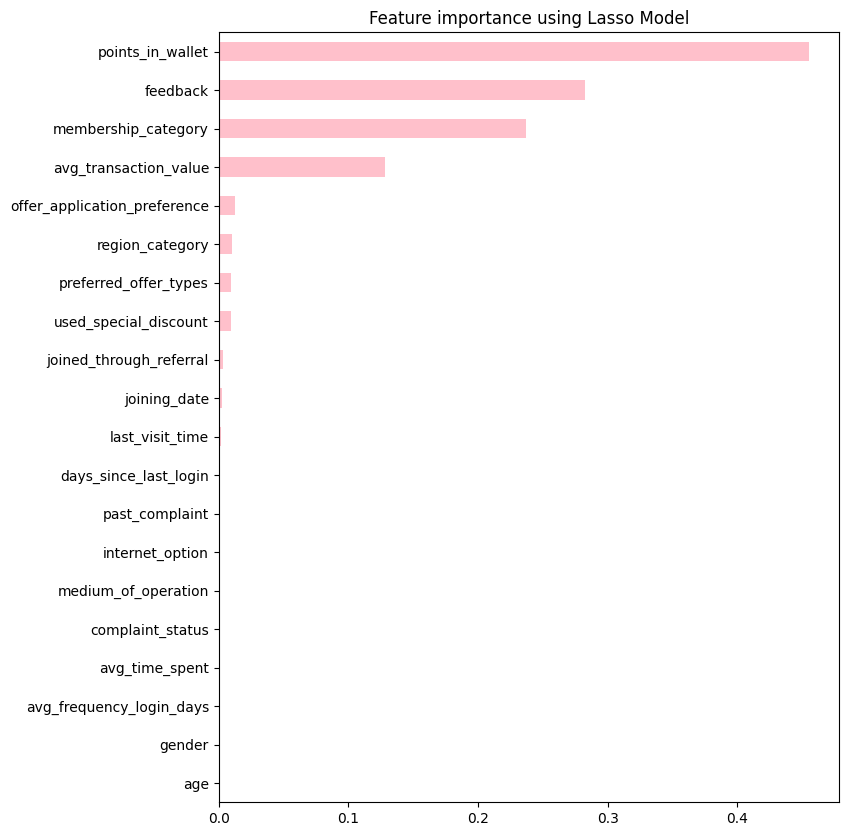

In [130]:
imp_coef = coef.abs().sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh", color= 'pink')
plt.title("Feature importance using Lasso Model")
plt.show()

In [131]:
drop_columns = ['complaint_status', 'avg_frequency_login_days', 'avg_time_spent', 
         'medium_of_operation', 'internet_option', 'age', 'gender']

In [132]:
data_scaled = data_scaled.drop(drop_columns, axis=1)

In [133]:
x = data_scaled.drop('churn_risk_score', axis=1)
y = data_scaled['churn_risk_score']

In [134]:
y_n = y_n.astype(int)
y_n = y_n.replace(-1, 0)

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y_n,test_size=0.20,random_state=42)


In [136]:
import time
starttime= time.process_time()

xg = xgb.XGBClassifier(max_depth=5, n_estimators=100)
xg.fit(x_train,y_train)
predict = xg.predict(x_test)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by XGBoost after feature engineering is" ,(totaltime),'seconds')



Total time taken by XGBoost after feature engineering is 20.924791999999997 seconds


In [137]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

acc = accuracy_score(y_test,predict)
print(f'Accuracy of model is',acc*100)

Accuracy of model is 76.83397683397683


In [158]:
predict.mean()

3.6066602316602316

In [139]:
data_scaled.columns

Index(['region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'preferred_offer_types', 'last_visit_time',
       'days_since_last_login', 'avg_transaction_value', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score'],
      dtype='object')

In [142]:
import joblib
joblib.dump(xg, 'xgboost_model.pkl') 


['xgboost_model.pkl']

In [141]:
data_scaled.dtypes

region_category                 float64
membership_category             float64
joining_date                    float64
joined_through_referral         float64
preferred_offer_types           float64
last_visit_time                 float64
days_since_last_login           float64
avg_transaction_value           float64
points_in_wallet                float64
used_special_discount           float64
offer_application_preference    float64
past_complaint                  float64
feedback                        float64
churn_risk_score                float64
dtype: object